In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [35]:
num_cols = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute binary categorical column with mode
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace=True)

In [36]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

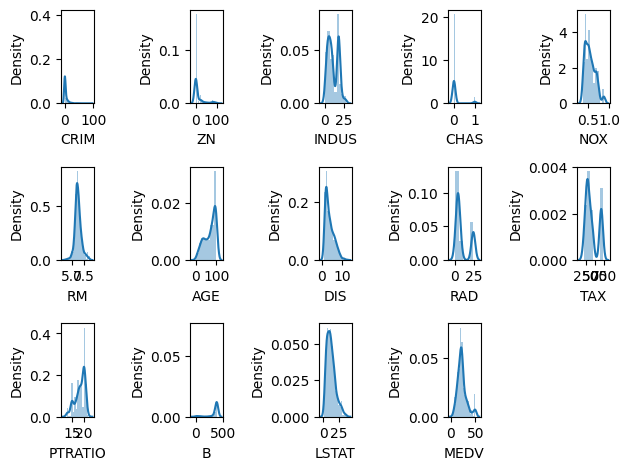

In [38]:
plotnumber = 1

for column in df:
    ax = plt.subplot(3,5,plotnumber)
    sns.distplot(df[column])
    plotnumber+=1
    
plt.tight_layout()

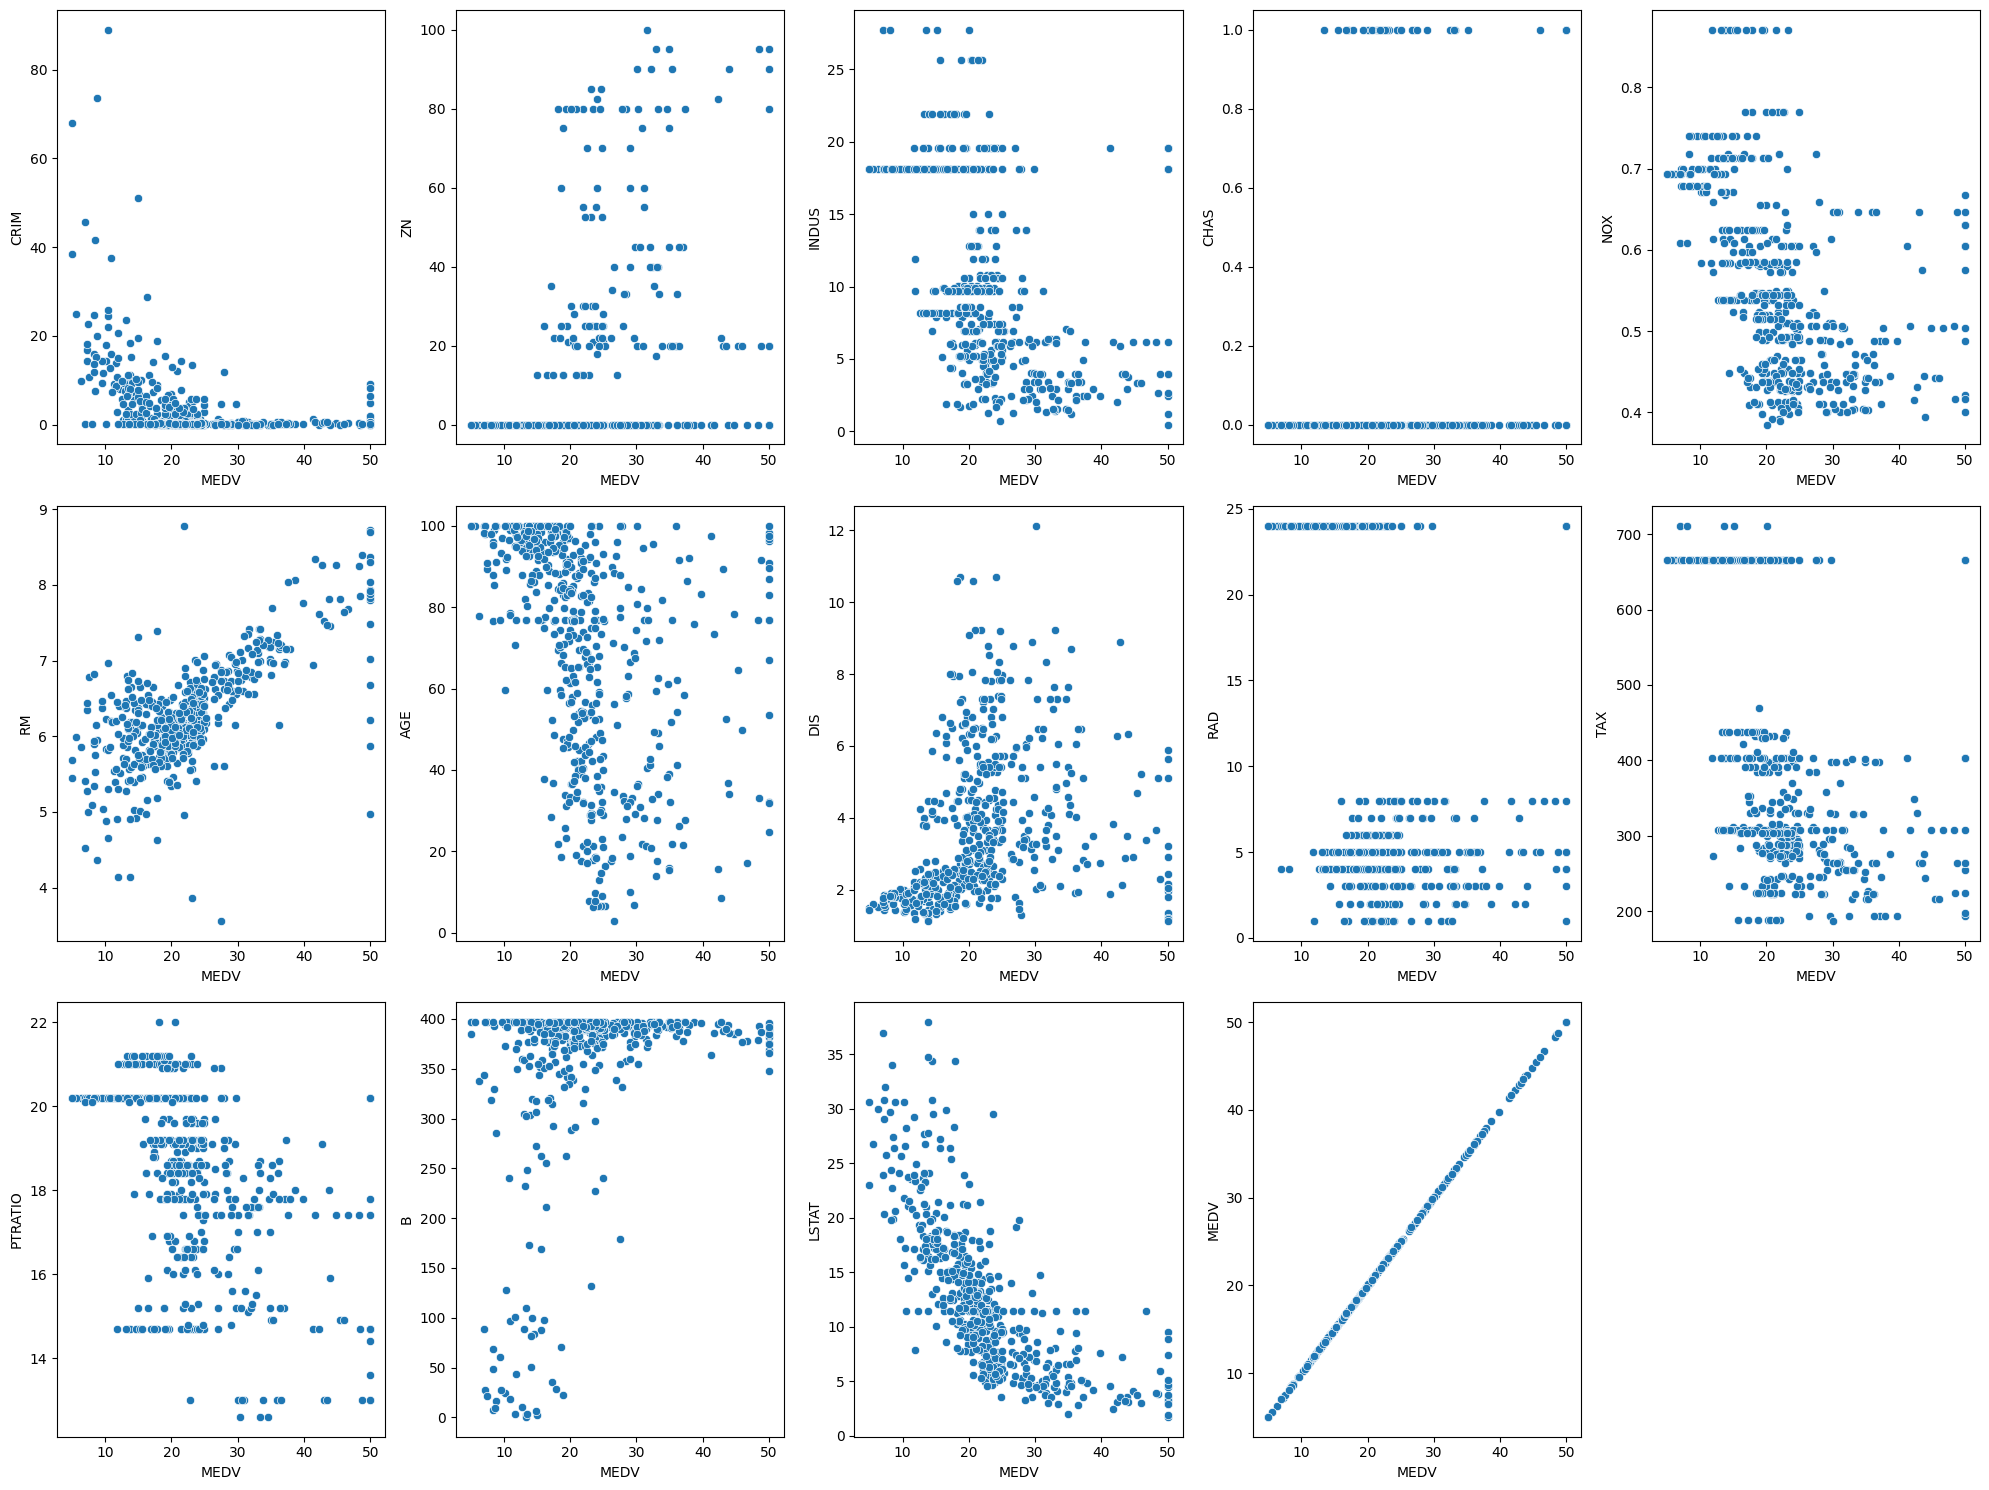

In [41]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = df['MEDV'], y = df[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

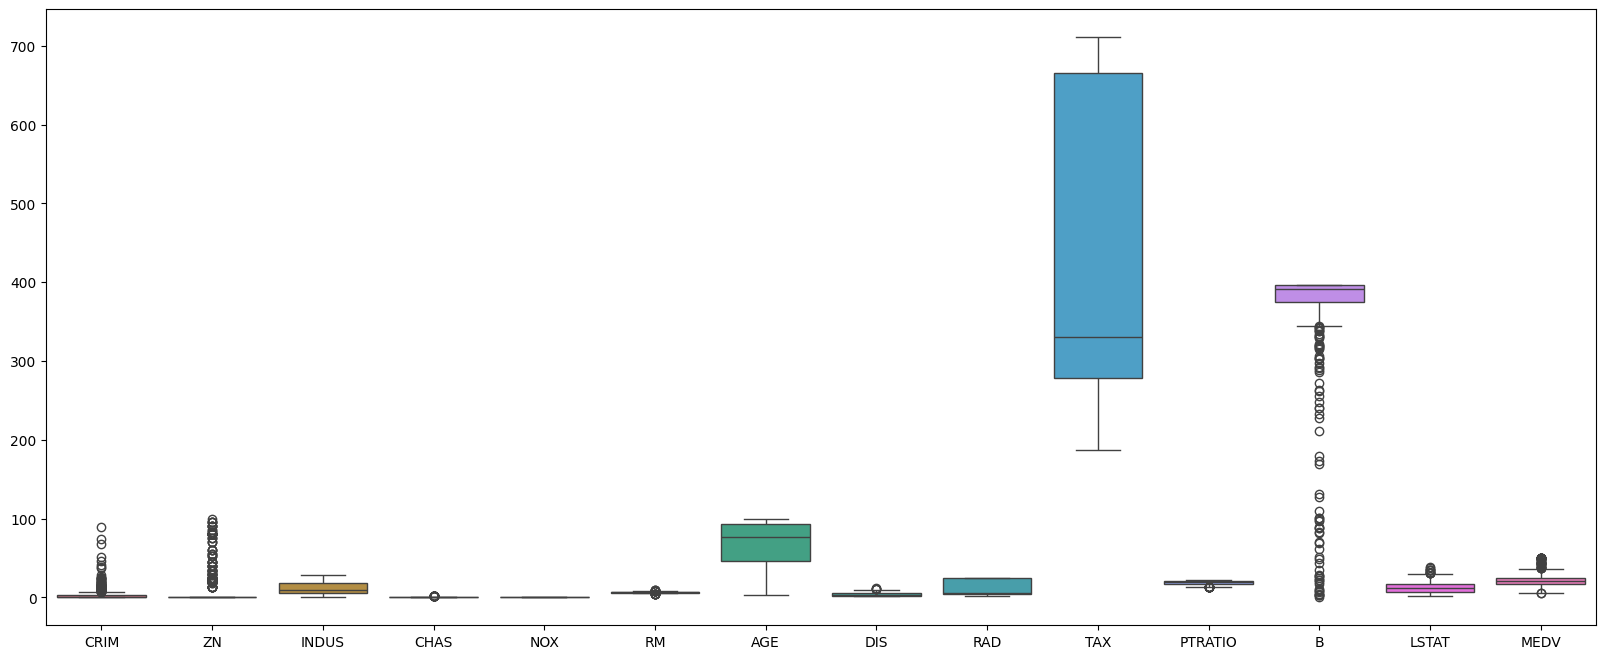

In [42]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

There are some outliers in data, so StandardScaler can help in scaling data.

In [43]:
X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.40559156,  0.31436884, -1.30170603, ..., -1.45900038,
         0.44105193, -1.09619345],
       [-0.40314013, -0.46815955, -0.59105154, ..., -0.30309415,
         0.44105193, -0.50277932],
       [-0.40314247, -0.46815955, -0.59105154, ..., -0.30309415,
         0.39642699, -1.23170869],
       ...,
       [-0.3992335 , -0.46815955,  0.13453268, ...,  1.17646583,
         0.44105193, -1.00204601],
       [-0.39353063, -0.46815955,  0.13453268, ...,  1.17646583,
         0.4032249 , -0.88222201],
       [-0.40079265, -0.46815955,  0.13453268, ...,  1.17646583,
         0.44105193, -0.68251533]], shape=(506, 13))

In [45]:
X.drop(columns = ['TAX'], axis = 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,21.0,391.99,11.43
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


<Axes: >

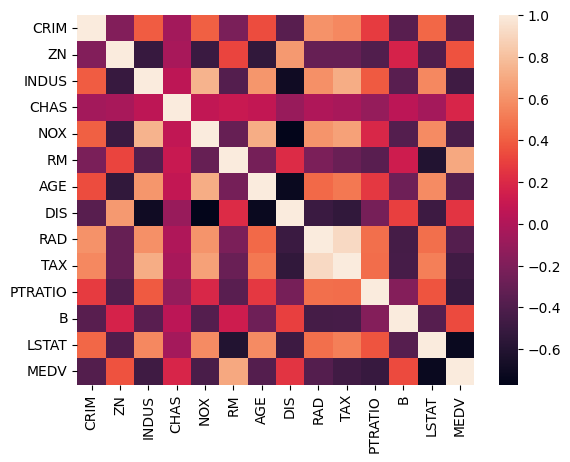

In [48]:
sns.heatmap(df.corr())

"RAD" and "TAX" columns are highly correlated which means multicollinearity is present so we have to remove one column.

In [49]:
df.drop(columns = 'RAD', axis = 1, inplace = True)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 0)

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [53]:
lr.score(X_train, y_train)

0.7588666072663288

In [54]:
lr.score(X_test, y_test)

0.6557113177471507

Model r2 score is less on the test data so there is chance of overfitting, let's check this using regularization.

## Lasso Regression

In [77]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.0006)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0006)

In [78]:
lasso.score(X_train, y_train)

0.7588664195818116

In [79]:
lasso.score(X_test, y_test)

0.6556613670802327

## Ridge Regression

In [82]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([3.53712902, 7.95468031, 9.51901614, 6.18851435, 4.3224399 ,
       6.9015383 , 2.82470127, 8.93478593, 0.17511557, 3.62312483,
       6.10914322, 7.49652001, 5.3472524 , 3.17404801, 0.30721675,
       8.27454102, 1.54993267, 5.11959084, 7.00823115, 8.35540631,
       3.95036083, 7.01881264, 9.99647155, 9.20927744, 5.7145828 ,
       1.32826046, 6.82147524, 8.18530135, 6.29381156, 5.00217237,
       2.87422258, 9.32726741, 3.54449786, 5.80082115, 2.48124722,
       3.2539436 , 5.84583568, 7.50270972, 5.24671702, 0.77266862,
       0.30658089, 4.64326823, 9.1907747 , 3.40860688, 5.33903193,
       2.96568038, 8.39656057, 6.94898726, 6.56938744, 9.46540482]),
        cv=10)

In [83]:
alpha = ridge_cv.alpha_
alpha

np.float64(9.996471550668694)

In [84]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define alphas
alphas = np.random.uniform(0, 10, 50)

# Create a pipeline with scaling + RidgeCV
ridge_cv = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas, cv=10)
)

# Fit the model
ridge_cv.fit(X_train, y_train)

# Access the best alpha (from inside the pipeline)
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
print("Best alpha:", best_alpha)


Best alpha: 9.430550996949


In [86]:
ridge = Ridge(alpha = best_alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=np.float64(9.430550996949))

In [87]:
ridge.score(X_train, y_train)

0.758060452986717

In [88]:
ridge.score(X_test, y_test)

0.6510493686728055